In [1]:
import os

# os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin")

from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow import keras
from model import *
from pre_process import *
import matplotlib.pyplot as plt

In [2]:
__label = '../Data/gt'
__source = '../Data/aug'

In [3]:
(trainX, trainY), (valX, valY), (testX, testY) = train_test_validation_split(__source, __label)
lcu_net = LCU_Net(debug=False)

model_checkpoint = ModelCheckpoint('./checkpoints/lcu-net2-{val_loss:.2f}.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

Model successfully made!


In [4]:
def train(lcu_net, initial_epoch=0):
    h = lcu_net.fit(trainX, trainY,
                    shuffle=True,
                    batch_size=16,
                    validation_data=(valX, valY),
                    epochs=25,
                    callbacks=[model_checkpoint],
                    initial_epoch=initial_epoch,
                    workers=-1)

    return h, lcu_net

In [5]:
def evaluate(lcu_net):
    
    result = lcu_net.evaluate(testX, testY)
    
    print(result)

In [6]:
trainY.shape

(840, 256, 256, 1)

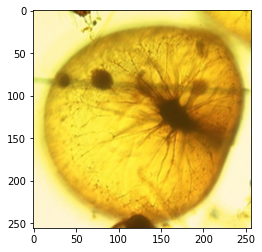

In [7]:
plt.imshow(trainX[0])

(array([21329.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 44207.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

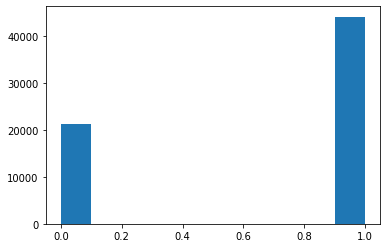

In [8]:
plt.hist(np.ndarray.flatten(trainY[0]))

In [9]:
lcu_net = LCU_Net(debug=False)

Model successfully made!


In [10]:
%%time
h, lcu_net = train(lcu_net)

Epoch 1/25
53/53 [==============================] - ETA: 0s - loss: 0.5588 - accuracy: 0.7641
Epoch 00001: val_loss improved from inf to 0.43895, saving model to ./checkpoints\lcu-net2-0.44.hdf5
53/53 [==============================] - 34s 479ms/step - loss: 0.5588 - accuracy: 0.7641 - val_loss: 0.4389 - val_accuracy: 0.8512
Epoch 2/25
53/53 [==============================] - ETA: 0s - loss: 0.3917 - accuracy: 0.8469
Epoch 00002: val_loss improved from 0.43895 to 0.34621, saving model to ./checkpoints\lcu-net2-0.35.hdf5
53/53 [==============================] - 22s 411ms/step - loss: 0.3917 - accuracy: 0.8469 - val_loss: 0.3462 - val_accuracy: 0.8627
Epoch 3/25
53/53 [==============================] - ETA: 0s - loss: 0.2955 - accuracy: 0.8654
Epoch 00003: val_loss improved from 0.34621 to 0.31589, saving model to ./checkpoints\lcu-net2-0.32.hdf5
53/53 [==============================] - 22s 408ms/step - loss: 0.2955 - accuracy: 0.8654 - val_loss: 0.3159 - val_accuracy: 0.8734
Epoch 4/25


In [11]:
%%time
evaluate(lcu_net)

53/53 [==============================] - 9s 147ms/step - loss: 0.4367 - accuracy: 0.8936
[0.43674927949905396, 0.8935939073562622]
Wall time: 9 s


In [34]:
lcu_net.load_weights('./checkpoints\lcu-net2-0.23.hdf5')

In [35]:
prediction = lcu_net.predict(testX)

In [44]:
segmented = prediction.copy()
threshold = 0.15
segmented[segmented <= threshold] = 0
segmented[segmented > threshold] = 1

In [45]:
def show(X, Y, segmented, index):
    plt.imshow(X[index])
    plt.show()
    plt.imshow(Y[index])
    plt.show()
    plt.imshow(segmented[index])
    plt.show()

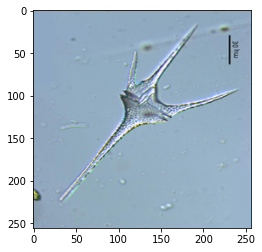

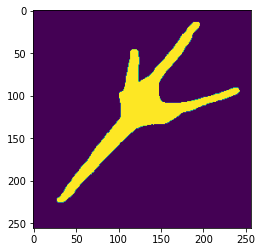

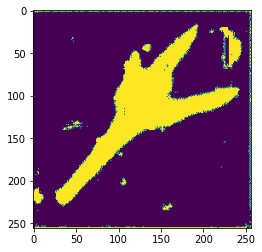

In [52]:
show(testX, testY, segmented, 10)

In [ ]:
# pred_mask = tf.argmax(prediction[2], axis=-1)
# pred_mask = pred_mask[..., tf.newaxis]
# plt.imshow(pred_mask[:,:,0])

In [33]:
lcu_net.save('./lcu_net8-5_10-thres:15.hdf5')